# Problem Statement:-

Subsidy Inc. is a company which delivers subsidies to individuals based on their income. Accurate income data is one of the hardest piece of data to obtain across the world. They have obtained a large data set of authenticated data on individual income, demographic parameters, and a few financial parameters. They wishes us to develop an income classifier system for individuals.

# Objective:-

Build an Income Classifier and simplify the data system by reducing the number of variables to be studied without sacrificing too much of accuracy. Such a system would help Subsidy Inc. in planning subsidy outlay, monitoring and preventing misuse. 

# Classifying personal income

# Required Packages

In [115]:
# To work with dataframes
import pandas as pd

In [116]:
# To perform numerical operations
import numpy as np

In [117]:
import matplotlib.pyplot as plt

In [118]:
# To visualise data
import seaborn as sns

# setting dimensions for plot

In [119]:
sns.set(rc={'figure.figsize':(11.7, 8.27)})

# reading csv file

In [120]:
income_data = pd.read_csv('E:/Python for data science NPTEL/income.csv')
print(income_data)

       age       JobType         EdType        maritalstatus  \
0       45       Private        HS-grad             Divorced   
1       24   Federal-gov        HS-grad        Never-married   
2       44       Private   Some-college   Married-civ-spouse   
3       27       Private            9th        Never-married   
4       20       Private   Some-college        Never-married   
...    ...           ...            ...                  ...   
31973   34     Local-gov        HS-grad        Never-married   
31974   34     Local-gov   Some-college        Never-married   
31975   23       Private   Some-college   Married-civ-spouse   
31976   42     Local-gov   Some-college   Married-civ-spouse   
31977   29       Private      Bachelors        Never-married   

             occupation     relationship    race   gender  capitalgain  \
0          Adm-clerical    Not-in-family   White   Female            0   
1          Armed-Forces        Own-child   White     Male            0   
2        

# creating copy

In [121]:
income = income_data.copy()

It is necessary to create a copy of original data so that it remains unaffected.

# Exploratory data analysis:

1. Getting to know the data
2. Data preproccessing (Missing values)
3. Cross tables and data visualization

# Getting to know the data

In [122]:
print(income.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB
None


It has been observed that there are no missing values in the dataset and the DataType is either integer or object.

# Data preproccessing

# checking for missing values

In [123]:
income.isnull()
print(income.isnull().sum())

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64


# summary of numerical variables

In [124]:
summary_num = income.describe()
print(summary_num)

                age   capitalgain   capitalloss  hoursperweek
count  31978.000000  31978.000000  31978.000000  31978.000000
mean      38.579023   1064.360623     86.739352     40.417850
std       13.662085   7298.596271    401.594301     12.345285
min       17.000000      0.000000      0.000000      1.000000
25%       28.000000      0.000000      0.000000     40.000000
50%       37.000000      0.000000      0.000000     40.000000
75%       48.000000      0.000000      0.000000     45.000000
max       90.000000  99999.000000   4356.000000     99.000000


# summary of categorical variable

In [125]:
summary_cate = income.describe(include = "O")
print(summary_cate)

         JobType    EdType        maritalstatus       occupation relationship  \
count      31978     31978                31978            31978        31978   
unique         9        16                    7               15            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       22286     10368                14692             4038        12947   

          race gender   nativecountry                        SalStat  
count    31978  31978           31978                          31978  
unique       5      2              41                              2  
top      White   Male   United-States   less than or equal to 50,000  
freq     27430  21370           29170                          24283  


# Frquency  of each categories

In [126]:
income['JobType'].value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 ?                    1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: JobType, dtype: int64

In [127]:
income['occupation'].value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [128]:
income['SalStat'].value_counts()

 less than or equal to 50,000    24283
 greater than 50,000              7695
Name: SalStat, dtype: int64

# checking for unique classes

In [130]:
print(np.unique(income['JobType']))
print(np.unique(income['occupation']))

[' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']
[' ?' ' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']


As can be seen from the above results. there exist a special character ' ?' instead of 'nan' in JobType and occupation.

Since python doesn't read any special character, so I replaced '?' with "nan".

In [16]:
income = pd.read_csv('E:/Python for data science NPTEL/income.csv',na_values=[" ?"])

In [17]:
# Data preproccessing
income.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [18]:
missing = income[income.isnull().any(axis = 1)]

# Points to note:
1. Missing values in jobtype = 1809
2. Missing values in occupation = 1816
3. There are 1809 rows where two specific columns i.e occupation and jobtype have missing values.
4. (1816 - 1809)= 7 => We still have occupation unfilled for these 7 rows. Because jobtype is never worked.
5. Since the JobType category 'Never worked' has no values in occupation field, so it can also be dropped because they are only 7 such entries of 'Never-worked' category and moreover they don't impact the model. 

In [19]:
income_copy = income.dropna(axis = 0) 

# Relationship between independent variables

In [20]:
correlation = income_copy.corr()
print(correlation)

                   age  capitalgain  capitalloss  hoursperweek
age           1.000000     0.080154     0.060165      0.101599
capitalgain   0.080154     1.000000    -0.032229      0.080432
capitalloss   0.060165    -0.032229     1.000000      0.052417
hoursperweek  0.101599     0.080432     0.052417      1.000000


Correlation value lies between -1 and 1. Values close to -1 or 1 describes the relationship between two variables whereas values close to 0 describes that the variables are independent. 

# Cross table and data visualization

# extracting column names

In [21]:
income_copy.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

# gender proportion table

In [22]:
gender = pd.crosstab(index = income["gender"], columns = 'count', normalize = True)
print(gender)

col_0       count
gender           
 Female  0.331728
 Male    0.668272


# gender vs salary

In [23]:
gender_salstat = pd.crosstab(index = income_copy["gender"], columns = income_copy['SalStat'], margins = True, normalize = 'index')
print(gender_salstat)

SalStat   greater than 50,000   less than or equal to 50,000
gender                                                      
 Female              0.113678                       0.886322
 Male                0.313837                       0.686163
All                  0.248922                       0.751078


# Frequency distribution of salary status

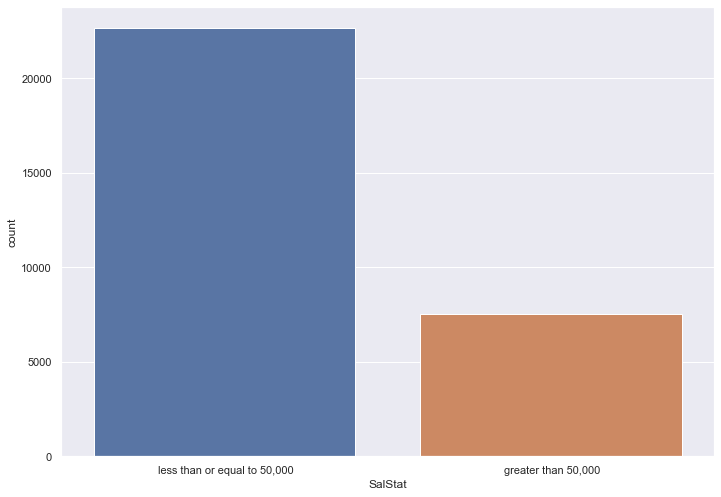

In [24]:
SalStat = sns.countplot(income_copy['SalStat'])

It can be observed that 75% of people's salary status is <=50000 and 25% of people's salary status is >=50000

# Histogram of age

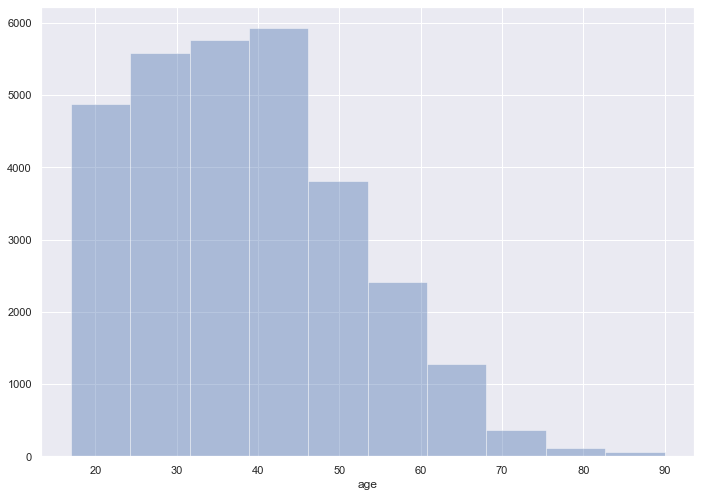

In [25]:
sns.distplot(income_copy['age'], bins=10,kde=False)

It can be seen from the above plot that people with age 20-45 age are high in frequency.

# Box-plot - Age vs Salary status

SalStat
 greater than 50,000             43
 less than or equal to 50,000    34
Name: age, dtype: int64

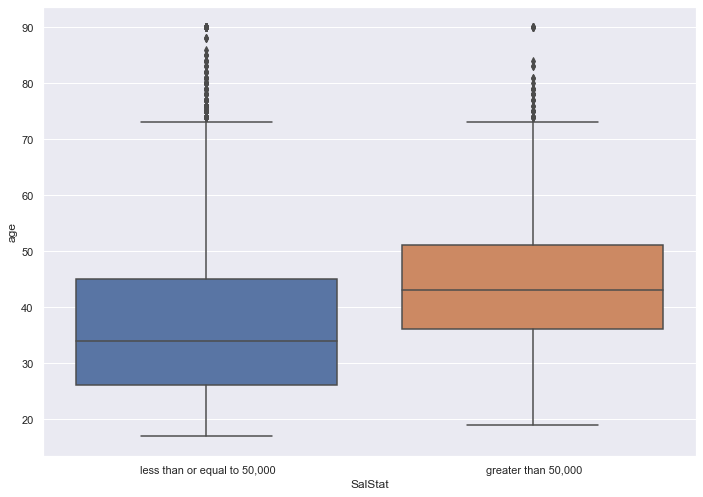

In [26]:
sns.boxplot('SalStat', 'age', data = income_copy)
income_copy.groupby('SalStat')['age'].median()

It can be observed that:

people with 35-50 age are more likely to earn >50000

people with 25-35 age are more likely to earn <=50000

# Box plot - hours per week vs salary status

SalStat
 greater than 50,000             40
 less than or equal to 50,000    40
Name: hoursperweek, dtype: int64

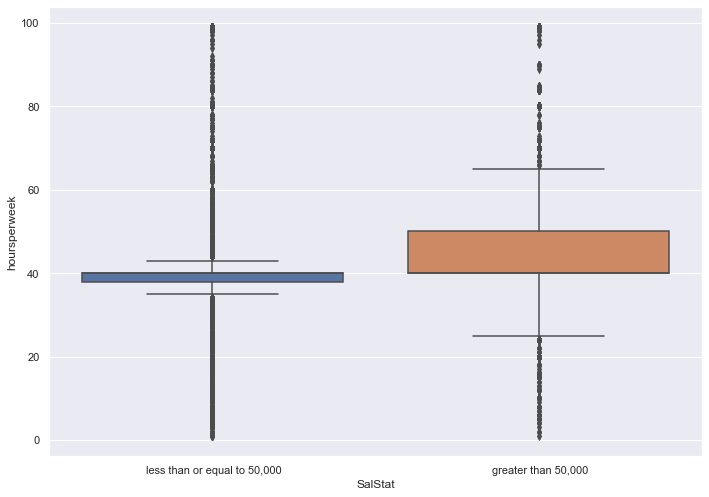

In [27]:
sns.boxplot('SalStat', 'hoursperweek', data = income_copy)
income_copy.groupby('SalStat')['hoursperweek'].median()

# Histogram of capitalgain

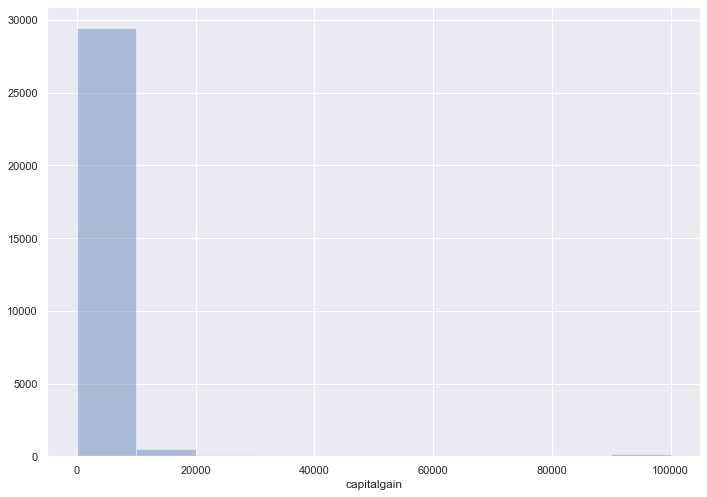

In [28]:
sns.distplot(income_copy['capitalgain'], bins=10,kde=False)

# JobType vs Salary

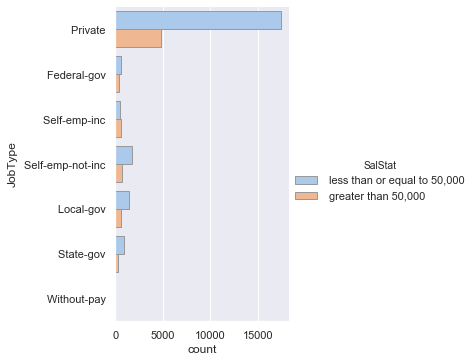

In [29]:
sns.catplot(y="JobType", hue="SalStat", kind="count", palette="pastel", edgecolor="0.6",data=income_copy)

# Education vs Salary Status

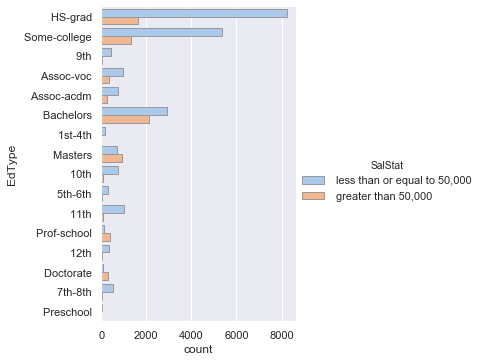

In [30]:
sns.catplot(y="EdType", hue="SalStat", kind="count", palette="pastel", edgecolor="0.6",data=income_copy)

# Occupation vs Salary status

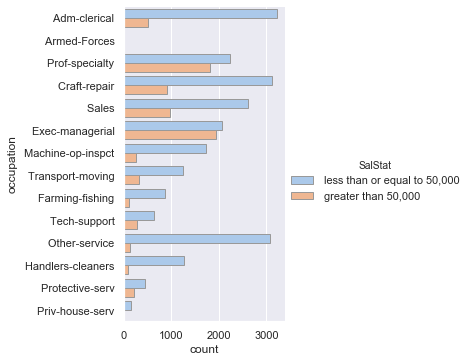

In [31]:
sns.catplot(y="occupation", hue="SalStat", kind="count", palette="pastel", edgecolor="0.6",data=income_copy)

# Building Income Classifier: 
Now, in below steps of the code, I constructed a model by using three different algorithms i.e Logistic Regression, KNN and Random Forest on two types of datasets in order to obtain best possible accuracy for my model.

# Two types of datasets are:
1. Data obtained by including all the variables.
2. Data obtained by excluding the insignificant variables. In this step, I drop the insignificant variables in income classifier model using variable selection to obtain highest accuracy.

# Importing necessary libraries

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [108]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Model building with all variables included

# Logistic Regression (with all variables)

In [37]:
# Reindexing the salary status names to 0,1
income_copy['SalStat']=income_copy['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})
print(income_copy['SalStat'])

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64


E:\Anaconda 3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [38]:
income_copy1 = pd.get_dummies(income_copy, drop_first=True)

In [39]:
# Storing the column names
columns_list = list(income_copy1.columns)
print(columns_list)

['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat', 'JobType_ Local-gov', 'JobType_ Private', 'JobType_ Self-emp-inc', 'JobType_ Self-emp-not-inc', 'JobType_ State-gov', 'JobType_ Without-pay', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-s

# In this Income Classifier model, we have to classify the income of people based on the various variables given below (defined by 'features' variable).

# Therefore, Salary Status is taken as dependent variable and all the other variables are taken as independent variables.

In [40]:
# Separatin the input names from the data
features = list(set(columns_list)-set(['SalStat']))
print(features)

['EdType_ 12th', 'nativecountry_ Jamaica', 'JobType_ Self-emp-inc', 'nativecountry_ Nicaragua', 'capitalgain', 'nativecountry_ Holand-Netherlands', 'nativecountry_ Columbia', 'EdType_ 5th-6th', 'nativecountry_ Yugoslavia', 'occupation_ Farming-fishing', 'JobType_ Local-gov', 'nativecountry_ Puerto-Rico', 'EdType_ 9th', 'EdType_ Some-college', 'EdType_ Assoc-acdm', 'relationship_ Unmarried', 'EdType_ Doctorate', 'occupation_ Protective-serv', 'maritalstatus_ Never-married', 'nativecountry_ Taiwan', 'nativecountry_ India', 'nativecountry_ Philippines', 'occupation_ Sales', 'EdType_ 1st-4th', 'hoursperweek', 'occupation_ Prof-specialty', 'nativecountry_ Greece', 'EdType_ Bachelors', 'EdType_ Preschool', 'nativecountry_ Ecuador', 'nativecountry_ Portugal', 'relationship_ Wife', 'nativecountry_ Iran', 'EdType_ 7th-8th', 'EdType_ Assoc-voc', 'nativecountry_ Trinadad&Tobago', 'relationship_ Other-relative', 'nativecountry_ Ireland', 'maritalstatus_ Married-civ-spouse', 'occupation_ Transport-

In [41]:
# Storing the output values in y
y = income_copy1['SalStat'].values
print(y)

[0 0 1 ... 0 0 0]


In [42]:
# Storing input values from featues
x = income_copy1[features].values
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [43]:
# Splitting the data into train and test
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3, random_state=3)

In [44]:
# Make an instance of the model
logistic = LogisticRegression()

In [45]:
# Fitting the values of x and y
logistic.fit(train_x,train_y)

E:\Anaconda 3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
# Prediction from test data
prediction_lgr1 = logistic.predict(test_x)
print(prediction_lgr1)

[0 0 0 ... 0 0 0]


In [47]:
# Confusion matrix
confusion_matrix = confusion_matrix(test_y, prediction_lgr1)
print(confusion_matrix)

[[6331  490]
 [ 950 1278]]


It has been observed that our model has classified 6331 samples correctly as "less than equal to 50000" and has misclassified 490 samples as " greater than 50000".

Also, our model has classified 1278 samples correctly as "greater than 50000" and has misclassified 950 samples as " less than equal to 50000".

In [48]:
# Calculating accuracy
accuracy_score = accuracy_score(test_y, prediction_lgr1)
print(accuracy_score)

0.8408663940766935


In [49]:
# Printing misclassified values from prediction
print('Misclassified samples: %d' % (test_y != prediction_lgr1).sum())

Misclassified samples: 1440


# KNN (with all variables)

In [50]:
# Storing the K nearest neighbors classifier
KNN_classifier = KNeighborsClassifier(n_neighbors = 5)

In [51]:
# fittin the values for X and Y
KNN_classifier.fit(train_x, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [52]:
# Predicitng the test values with the model
prediction_knn1 = KNN_classifier.predict(test_x)

In [55]:
# performance matrix check
confusion_matrix = confusion_matrix(test_y, prediction_knn1)
print(confusion_matrix)

[[6211  610]
 [ 823 1405]]


In [56]:
# Calculating accuracy
accuracy_score = accuracy_score(test_y, prediction_knn1)
print(accuracy_score)

0.8416399602165985


In [57]:
# Printing misclassified values from prediction
print('Misclassified samples: %d' % (test_y != prediction_knn1).sum())

Misclassified samples: 1433


In [58]:
Misclassified_sample = []

In [59]:
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x,train_y)
    pred_i = knn.predict(test_x)
    Misclassified_sample.append((test_y != pred_i).sum())
    
print(Misclassified_sample)    

[1690, 1490, 1486, 1396, 1433, 1394, 1444, 1385, 1408, 1384, 1414, 1387, 1392, 1396, 1389, 1387, 1358, 1365, 1385]


for k = 17, the misclassified samples are lowest. So put K = 17 in the given KNN model

In [60]:
# Storing the K nearest neighbors classifier
KNN_classifier = KNeighborsClassifier(n_neighbors = 17)

In [61]:
# fittin the values for X and Y
KNN_classifier.fit(train_x, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

In [62]:
# Predicitng the test values with the model
prediction_knn2 = KNN_classifier.predict(test_x)

In [65]:
# performance matrix check
confusion_matrix = confusion_matrix(test_y, prediction_knn2)
print(confusion_matrix)

[[6349  472]
 [ 886 1342]]


In [66]:
# Calculating accuracy
accuracy_score = accuracy_score(test_y, prediction_knn2)
print(accuracy_score)

0.8499281688584374


In [67]:
# Printing misclassified values from prediction
print('Misclassified samples: %d' % (test_y != prediction_knn2).sum())

Misclassified samples: 1358


# Random forest (with all variables)

In [68]:
rf = RandomForestClassifier(n_estimators=100, max_features='auto', max_depth=100, min_samples_split=10, min_samples_leaf=4, random_state=1)

In [69]:
model_rf1 = rf.fit(train_x,train_y)

In [70]:
predictions_rf1 = rf.predict(test_x)

In [73]:
# performance matrix check
confusion_matrix = confusion_matrix(test_y, predictions_rf1)
print(confusion_matrix)

[[6447  374]
 [ 906 1322]]


In [74]:
# Calculating accuracy
accuracy_score = accuracy_score(test_y,predictions_rf1)
print(accuracy_score)

0.8585479058459499


In [75]:
# Printing misclassified values from prediction
print('Misclassified samples: %d' % (test_y != predictions_rf1).sum())

Misclassified samples: 1280


# Model building by dropping insignificant variables
In order to improve the model accuracy further, insignificant variables are dropped off from the model. Variable selection has been performed and variables are dropped/kept in the model based on their significance and to achieve highest possible accuracy in the model

# Logistic Regression

In [76]:
income_copy2 = income.dropna(axis = 0) 

In [77]:
# Reindexing salary status names to 0,1
income_copy2['SalStat']=income_copy2['SalStat'].map({' less than or equal to 50,000':0,' greater than 50,000':1})
print(income_copy2['SalStat'])

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64


E:\Anaconda 3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [78]:
cols = ['gender','relationship','race','nativecountry']
income_copy3 = income_copy2.drop(cols,axis=1)

In [79]:
income_copy3 = pd.get_dummies(income_copy3, drop_first=True)

In [80]:
# Storing the column names
columns_list = list(income_copy3.columns)
print(columns_list)

['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat', 'JobType_ Local-gov', 'JobType_ Private', 'JobType_ Self-emp-inc', 'JobType_ Self-emp-not-inc', 'JobType_ State-gov', 'JobType_ Without-pay', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-s

In [81]:
# Separatin the input names from the data
features = list(set(columns_list)-set(['SalStat']))
print(features)

['EdType_ 12th', 'JobType_ Self-emp-inc', 'capitalloss', 'occupation_ Tech-support', 'capitalgain', 'maritalstatus_ Widowed', 'occupation_ Exec-managerial', 'JobType_ Self-emp-not-inc', 'EdType_ 5th-6th', 'age', 'occupation_ Armed-Forces', 'occupation_ Farming-fishing', 'JobType_ Local-gov', 'EdType_ 9th', 'JobType_ Without-pay', 'EdType_ Some-college', 'EdType_ Assoc-acdm', 'maritalstatus_ Married-AF-spouse', 'EdType_ Doctorate', 'JobType_ Private', 'maritalstatus_ Never-married', 'occupation_ Protective-serv', 'occupation_ Sales', 'EdType_ 1st-4th', 'hoursperweek', 'occupation_ Other-service', 'occupation_ Prof-specialty', 'EdType_ Bachelors', 'EdType_ 11th', 'EdType_ Preschool', 'occupation_ Priv-house-serv', 'EdType_ 7th-8th', 'EdType_ Assoc-voc', 'occupation_ Handlers-cleaners', 'maritalstatus_ Married-civ-spouse', 'occupation_ Transport-moving', 'occupation_ Machine-op-inspct', 'JobType_ State-gov', 'EdType_ Prof-school', 'maritalstatus_ Separated', 'EdType_ HS-grad', 'EdType_ Ma

In [82]:
# Storing the output values in y
y = income_copy3['SalStat'].values
print(y)

[0 0 1 ... 0 0 0]


In [83]:
# Storing input values from featues
x = income_copy3[features].values
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [84]:
# Splitting the data into train and test
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3, random_state=3)

In [85]:
# Make an instance of the model
logistic1 = LogisticRegression()

In [86]:
# Fitting the values of x and y
logistic1.fit(train_x,train_y)

E:\Anaconda 3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
# Prediction from test data
prediction_lgr2 = logistic1.predict(test_x)
print(prediction_lgr2)

[0 0 0 ... 0 0 0]


In [91]:
# Calculating accuracy
accuracy_score = accuracy_score(test_y, prediction_lgr2)
print(accuracy_score)

0.841308431870925


In [92]:
# Printing misclassified values from prediction
print('Misclassified samples: %d' % (test_y != prediction_lgr2).sum())

Misclassified samples: 1436


# KNN

In [93]:
# Storing the K nearest neighbors classifier
KNN_classifier1 = KNeighborsClassifier(n_neighbors = 5)

In [94]:
# fittin the values for X and Y
KNN_classifier1.fit(train_x, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [95]:
# Predicitng the test values with the model
prediction_knn3 = KNN_classifier1.predict(test_x)

In [96]:
# performance matrix check
confusion_matrix = confusion_matrix(test_y, prediction_knn3)
print(confusion_matrix)

[[6278  543]
 [ 881 1347]]


In [99]:
# Calculating accuracy
accuracy_score = accuracy_score(test_y, prediction_knn3)
print(accuracy_score)

0.8426345452536191


In [100]:
# Printing misclassified values from prediction
print('Misclassified samples: %d' % (test_y != prediction_knn3).sum())

Misclassified samples: 1424


In [101]:
Misclassified_sample = []

In [102]:
# calculating error for k values between 1 and 20
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x,train_y)
    pred_i = knn.predict(test_x)
    Misclassified_sample.append((test_y != pred_i).sum())
    
print(Misclassified_sample)    

[1685, 1499, 1519, 1405, 1424, 1418, 1433, 1423, 1450, 1413, 1431, 1391, 1396, 1409, 1421, 1409, 1405, 1419, 1420]


# Random Forest

In [103]:
rf2 = RandomForestClassifier(n_estimators=100, max_features='auto', max_depth=100, min_samples_split=10, min_samples_leaf=4, random_state=1)

In [104]:
model_rf2 = rf2.fit(train_x,train_y)

In [105]:
predictions_rf2 = rf2.predict(test_x)

In [106]:
# performance matrix check
confusion_matrix = confusion_matrix(test_y, predictions_rf2)
print(confusion_matrix)

[[6458  363]
 [ 900 1328]]


In [109]:
# Calculating accuracy
accuracy_score = accuracy_score(test_y,predictions_rf2)
print(accuracy_score)

0.8604265664714333


In [110]:
# Printing misclassified values from prediction
print('Misclassified samples: %d' % (test_y != predictions_rf2).sum())

Misclassified samples: 1263


# Conclusion:-

In this case study we have looked at three algorithms, logistic regression, KNN and Random Forest. It has been observed that Random Forest algorithm gives better performance in terms of accuracy and number of misclassification with data obtained by excluding the insignificant variables. The accuracy of Random Forest model is 86.04% which is highest incomparison to other models and the number of misclassified samples is 1263 which is lowest incomparison to other models.